### Carregar a base de dados

In [80]:
import pandas as pd

cancer = pd.read_csv('breast_cancer.csv')

### Análise exploratória

In [81]:
# tamanho do dataset
cancer.shape

(569, 33)

In [82]:
# visualização
cancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [83]:
# verificar dados nulos
cancer.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [84]:
# remoção de colunas desnecessárias
cancer.drop(['Unnamed: 32', 'id'],axis=1,inplace=True)

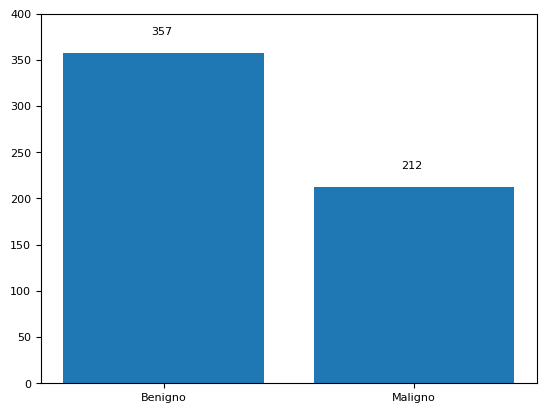

In [85]:
# visualizar a distribuição do diagnóstico de cancer
import matplotlib.pyplot as plt

diagnosis = cancer['diagnosis'].value_counts()
bars = ('Benigno', 'Maligno')

plt.bar(bars, diagnosis)
for i, value in enumerate(diagnosis):
    plt.text(i-0.05, value+20, str(value))

plt.ylim([0,400])
plt.show()

### Histograma

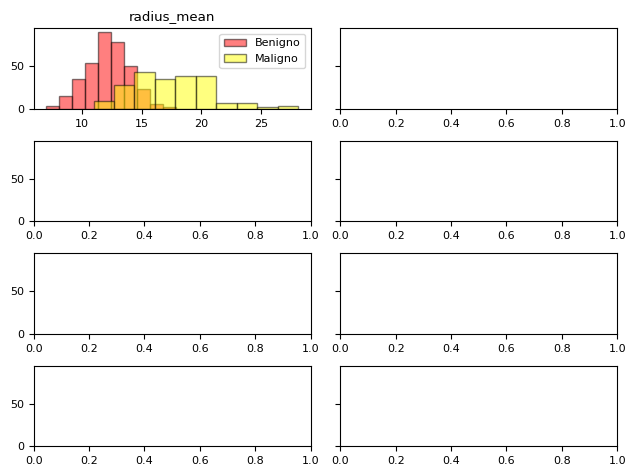

In [86]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(4, 2, sharey=True, tight_layout=True)


axs[0,0].hist(cancer['radius_mean'][cancer['diagnosis'] == 'B'], label='Benigno', alpha=.5, edgecolor='black', color='red')
axs[0,0].hist(cancer['radius_mean'][cancer['diagnosis'] == 'M'], label="Maligno", alpha=.5, edgecolor='black', color='yellow')
axs[0,0].set_title('radius_mean')
axs[0,0].legend()


# Showing the plot using plt.show()
plt.show()

### Preparação para o modelo

In [87]:
from sklearn.model_selection import train_test_split

X = cancer.drop(['diagnosis'],axis=1)
y = cancer['diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### Normalizar os dados

In [102]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns = X.columns)

### Aplicar o modelo

In [108]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

In [107]:
from sklearn.metrics import classification_report, accuracy_score
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           B       0.99      0.98      0.98       121
           M       0.96      0.99      0.97        67

    accuracy                           0.98       188
   macro avg       0.97      0.98      0.98       188
weighted avg       0.98      0.98      0.98       188

0.9787234042553191


### Matrix de confusão

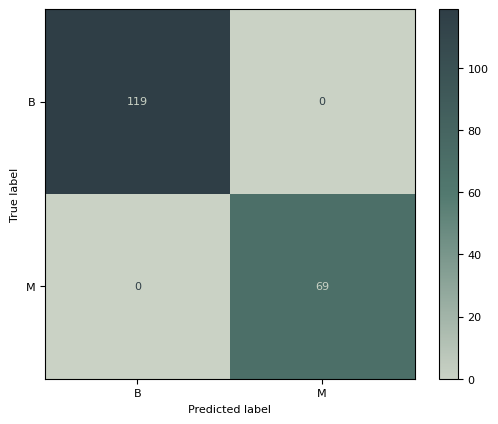

In [101]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.colors

#mapa_calor = matplotlib.colors.LinearSegmentedColormap.from_list("", ["#12239e","#92dfa6","#9cd33b"])
mapa_calor = matplotlib.colors.LinearSegmentedColormap.from_list("", ["#CAD2C5","#52796F","#2F3E46"])
ConfusionMatrixDisplay.from_estimator(logreg, X_test, y_pred, cmap = mapa_calor)
plt.grid(False)
plt.show()

https://www.kaggle.com/code/niteshyadav3103/breast-cancer-classification

https://www.kaggle.com/code/buddhiniw/breast-cancer-prediction?scriptVersionId=496896

https://www.kaggle.com/code/jagannathrk/predicting-breast-cancer-logistic-regression

https://www.kaggle.com/code/gpreda/breast-cancer-prediction-from-cytopathology-data